<a href="https://colab.research.google.com/github/IIILikeIII/Tools-for-Data-Science-Assignment-Create-and-share-Jupyter-Notebook/blob/main/TEIN_Sale_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [16]:
df = pd.read_csv('Sale volume forecast.csv')
df.head()

,Month,Total Sale volume,"V B AUTO SHOP CO.,LTD.","POR.TANAPAT 2013 CO.,LTD.","REPOWER CORPORATION CO.,LTD.","TEIN SERVICE CENTER(THAILAND)CO.,LTD.","UNIBOX (THAILAND) CO.,LTD","KC MOTORSPORT CO.,LTD.",MR.PAWAN VAIPANITEE,"PORTANAPAT 2010 PART.,LTD.",...,"SPORT MAG M CO.,LTD.",CHAICHAN KRANCHANG,"PTMA CO.,LTD.","AUTO FOURWHEEL SUPENSION PART.,LTD.",THANAWAT KARNCHANG,FOUR WHEEL TIRE,"NAMTHIPCHALERNKIT CO.,LTD","VALUE CREATION PLUS CO.,LTD.",ABAUTO MAX,"SONGSAENG AUTOTIRES CO.,LTD."
0,2022-04,8453406.35,4291.60,1056201.81,0.0,333839.33,192594.44,2429314.68,NaN,71027.10,...,0,0.0,0.00,0.0,0.0,0,0.00,150631.82,NaN,0.0
1,2022-05,9032829.00,1650659.26,796453.40,0.0,701531.02,195354.28,787646.83,NaN,33833.66,...,0,0.0,0.00,0.0,0.0,0,14764.48,90385.05,NaN,0.0
2,2022-06,11645939.97,1944100.38,979911.31,0.0,673854.29,307340.19,94625.26,NaN,255547.62,...,0,0.0,0.00,0.0,17708.4,0,0.00,92446.74,NaN,0.0
3,2022-07,6328834.23,371146.05,1996495.28,0.0,248486.02,94401.88,62432.67,NaN,54009.38,...,0,0.0,25570.09,0.0,0.0,0,0.00,66719.61,NaN,0.0
4,2022-08,8055657.43,1806618.47,395517.55,0.0,589826.10,189377.52,-1652.33,NaN,131856.08,...,0,0.0,7102.80,0.0,0.0,0,0.00,36850.48,NaN,0.0


In [4]:
df.shape

(32, 606)

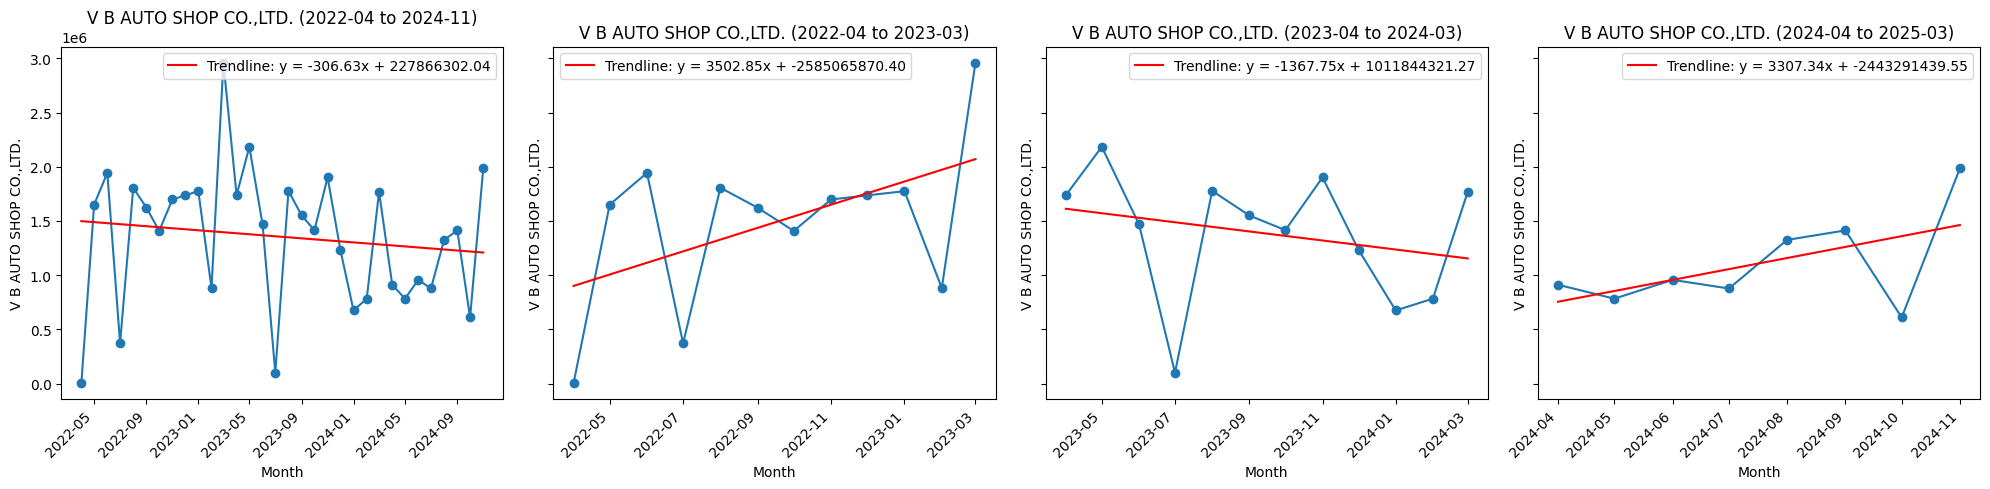

In [85]:
# prompt: simple create line graph with matplotlib.pyplot by x = df['Month'] and y is from df column 3
# and change the title to y column name.
# draw linear trend line and show trend equation
# with Y axis same scale
# create subplot by (4,1)
# by seperate 4 graph by
# 1. x between 2022-04 to 2024-11
# 2. x between 2022-04 to 2023-03
# 3. x between 2023-04 to 2024-03
# 4. x between 2024-04 to 2025-03

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress

df = pd.read_csv('Sale volume forecast.csv')

# Convert 'Month' column to datetime objects
df['Month'] = pd.to_datetime(df['Month'])

# Assuming the third column is indexed as 2
y_column_name = df.columns[2]  # Get the name of the 3rd column

fig, axes = plt.subplots(4, 1, figsize=(10, 20), sharey=True)  # Create subplots with shared y-axis

date_ranges = [
    ('2022-04', '2024-11'),
    ('2022-04', '2023-03'),
    ('2023-04', '2024-03'),
    ('2024-04', '2025-03')
]

for i, (start_date, end_date) in enumerate(date_ranges):
    # Filter data for the current date range
    mask = (df['Month'] >= start_date) & (df['Month'] <= end_date)
    df_filtered = df.loc[mask]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        pd.to_numeric(df_filtered.index), df_filtered.iloc[:, 2]
    )

    # Calculate trend line values
    trend_line = slope * pd.to_numeric(df_filtered.index) + intercept

    axes[i].plot(df_filtered['Month'], df_filtered.iloc[:, 2], marker='o', linestyle='-')
    axes[i].plot(df_filtered['Month'], trend_line, color='red', label='Trend Line')

    # Add trend equation to the plot
    trend_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    axes[i].text(0.05, 0.9, trend_equation, transform=axes[i].transAxes)


    axes[i].set_title(f"{y_column_name} ({start_date} - {end_date})")
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(y_column_name)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [90]:
def draw_graph(Column_index):


  df['Month'] = pd.to_datetime(df['Month'])

# Define the y-axis column
  y_column_index = 3  # Replace 3 with the actual index if different
  y_column_name = df.columns[y_column_index]

# Define the date ranges for each subplot
  date_ranges = [
     ('2022-04', '2024-11'),
     ('2022-04', '2023-03'),
     ('2023-04', '2024-03'),
     ('2024-04', '2025-03')
    ]

# Create a figure with 4 subplots
  fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)  # sharey for same y-scale

# Loop through each date range and create a subplot
  for i, (start_date, end_date) in enumerate(date_ranges):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

  # Filter data based on the current date range
    filtered_df = df[(df['Month'] >= start_date) & (df['Month'] <= end_date)]

  # Plot the data
    ax.plot(filtered_df['Month'], filtered_df.iloc[:, y_column_index], marker='o', linestyle='-')

  # Calculate the linear trendline
    x = np.arange(len(filtered_df))
    z = np.polyfit(x, filtered_df.iloc[:, y_column_index], 1)
    p = np.poly1d(z)
    ax.plot(filtered_df['Month'], p(x), "r--")

  # Add trend equation to the plot
    equation = f"y = {z[0]:.2f}x + {z[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10, verticalalignment='top')

  # Set title, labels, and ticks
    ax.set_title(f"{y_column_name} ({start_date} to {end_date})")
    ax.set_xlabel("Month")
    ax.set_ylabel(y_column_name)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

  plt.tight_layout()
  plt.show()

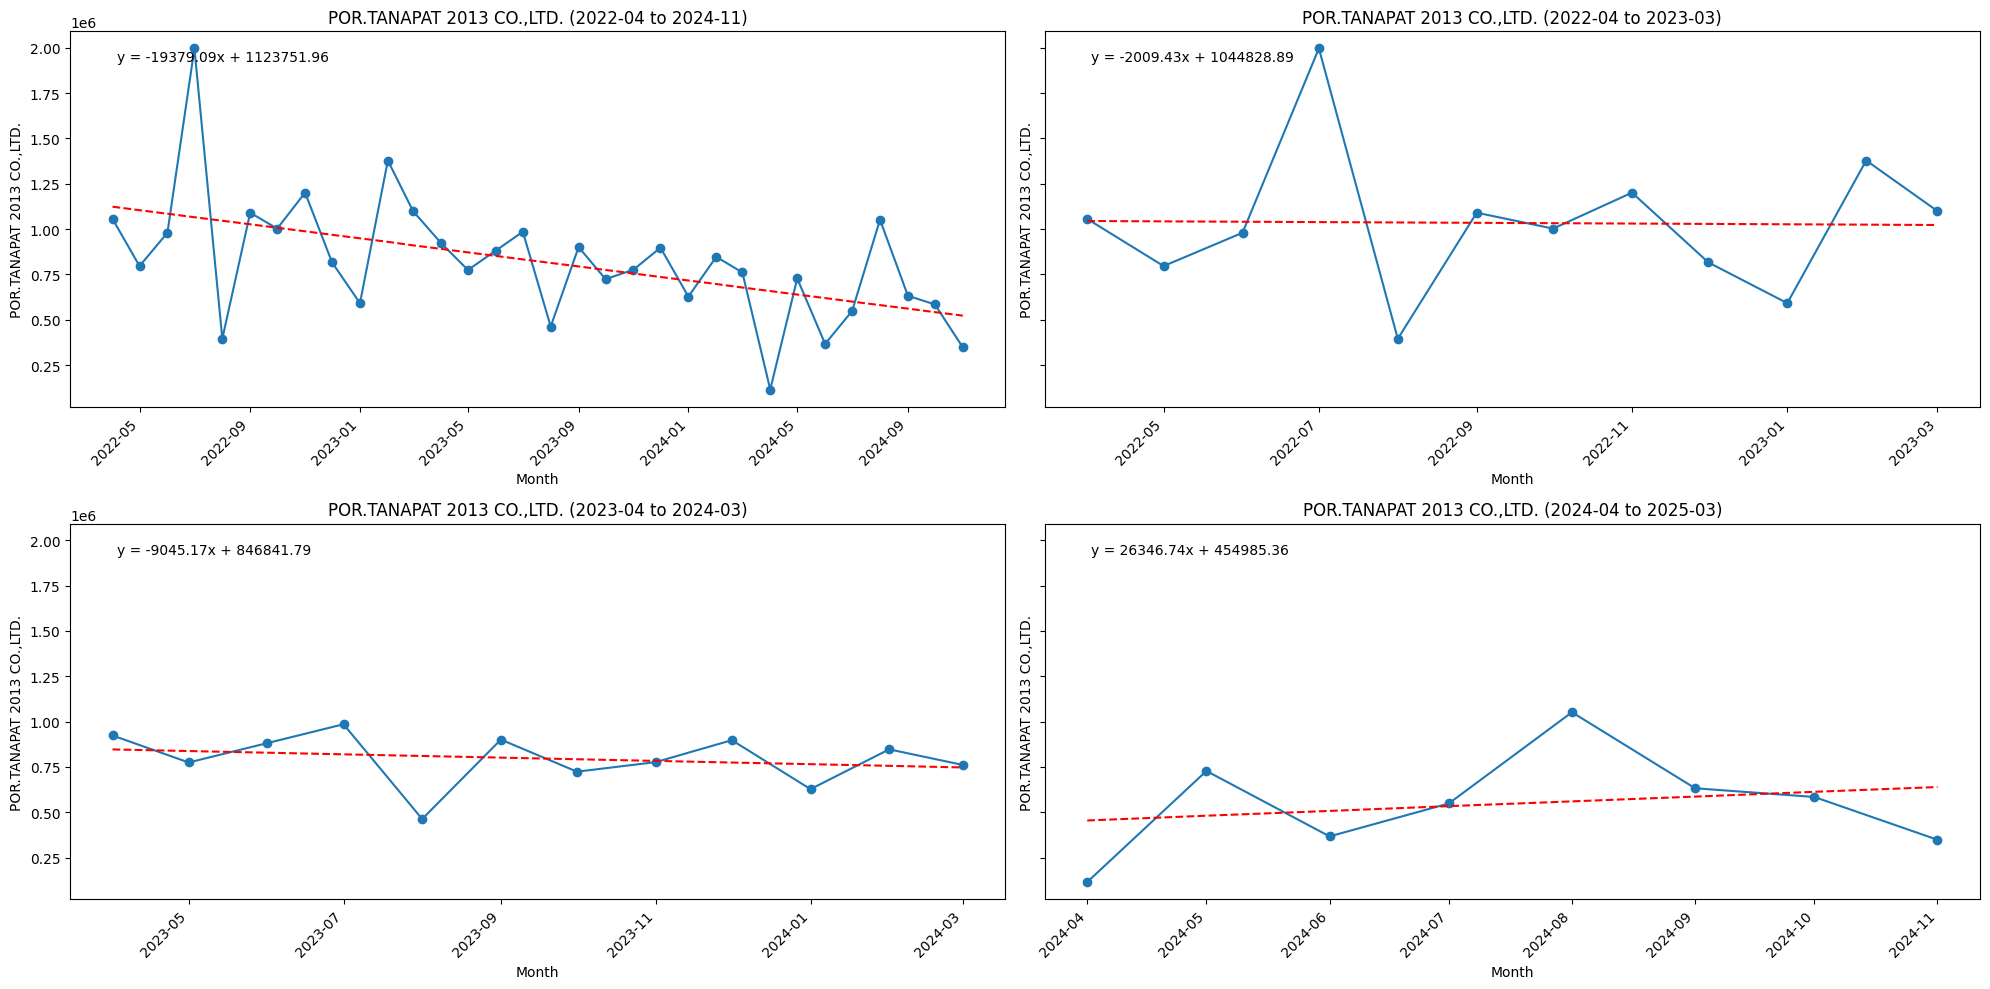

In [94]:
draw_graph(1)

In [68]:
df.describe()

,Month,Total Sale volume,"V B AUTO SHOP CO.,LTD.","POR.TANAPAT 2013 CO.,LTD.","REPOWER CORPORATION CO.,LTD.","TEIN SERVICE CENTER(THAILAND)CO.,LTD.","UNIBOX (THAILAND) CO.,LTD","KC MOTORSPORT CO.,LTD.",MR.PAWAN VAIPANITEE,"PORTANAPAT 2010 PART.,LTD.",...,"SPORT MAG M CO.,LTD.",CHAICHAN KRANCHANG,"PTMA CO.,LTD.","AUTO FOURWHEEL SUPENSION PART.,LTD.",THANAWAT KARNCHANG,FOUR WHEEL TIRE,"NAMTHIPCHALERNKIT CO.,LTD","VALUE CREATION PLUS CO.,LTD.",ABAUTO MAX,"SONGSAENG AUTOTIRES CO.,LTD."
count,32,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,3.200000e+01,18.000000,32.000000,...,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.0,32.000000
mean,2023-07-17 03:45:00,9.824828e+06,1.353718e+06,8.233761e+05,458134.355000,413310.074375,307813.439062,3.761176e+05,320164.252778,123023.366250,...,437.500000,168.66250,1021.027812,652.161250,553.387500,468.750000,461.390000,38467.005937,0.0,4333.703125
min,2022-04-01 00:00:00,6.328834e+06,4.291600e+03,1.157449e+05,0.000000,163154.210000,94401.880000,-1.489532e+04,82419.030000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-16616.820000,0.0,-8125.240000
25%,2022-11-23 12:00:00,8.879421e+06,8.801431e+05,6.188694e+05,315317.305000,300795.310000,191790.210000,0.000000e+00,163387.852500,43182.242500,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2023-07-16 12:00:00,9.582764e+06,1.442776e+06,8.064426e+05,510188.780000,418437.350000,295477.125000,7.869454e+04,287432.230000,97577.575000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,2024-03-08 18:00:00,1.116868e+07,1.769922e+06,9.898905e+05,627645.067500,493416.125000,380224.315000,6.090346e+05,463466.142500,172443.937500,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,81504.670000,0.0,0.000000
max,2024-11-01 00:00:00,1.266739e+07,2.962305e+06,1.996495e+06,932347.640000,983760.640000,651457.930000,2.429315e+06,687439.240000,360744.870000,...,14000.000000,5397.20000,25570.090000,20869.160000,17708.400000,15000.000000,14764.480000,168135.520000,0.0,65551.410000
std,NaN,1.604102e+06,6.360212e+05,3.466484e+05,289669.984926,170945.097841,146249.676993,5.554427e+05,179571.699917,101624.279143,...,2474.873734,954.09918,4652.156423,3689.181138,3130.432431,2651.650429,2610.015982,57074.723323,0.0,12812.403873
